# Exploratory Data Analysis(EDA)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
df_EDA = pd.read_csv("C:/Users/User/Desktop/Silicon_train/Silicon_Valley.txt")
df_EDA

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [5]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


In [11]:
print(df_EDA.shape)

(16512, 10)


In [ ]:
# Notre set comporte 11 colonnes et 16512 lignes 
# La target y est la "median_house_value" qui représente le prix des maisons dans un district en Californie 
# il y a features 10 features: 
# 9 sont numériques, int ou float 
# 1 est en object (categorical), "ocean_proximity", on doit voir le nombre de catégorie que nous avons 

In [9]:
df_EDA["ocean_proximity"].unique()

array(['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [12]:
df_EDA["ocean_proximity"].value_counts()

<1H OCEAN     7312
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
ISLAND           4
Name: ocean_proximity, dtype: int64

In [ ]:
#Etant donnée qu'il n'y a pas d'hiéarchie entre ces catégories, on va hoter pour un hot one encoding pour la suite de l'analyse

In [ ]:
#On va explorer le dataset pour savoir si nous avons des missing values ou des duplicates 

In [10]:
df_EDA.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16507    False
16508    False
16509    False
16510    False
16511    False
Length: 16512, dtype: bool

In [6]:
df_EDA.isnull().sum()

Unnamed: 0              0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
#Pas de duplicates dans ce set 
#176 cases vides sur la feature "total_bedrooms" ce qui parait à ce stade negligeable par rapport à la taille du set
#On peut soit les supprimer, soit utiliser la median ou le KNN imputer pour les remplir, on verra sa par la suite  

In [ ]:
#On peu suprimmer la première colonne 

In [84]:
df_EDA = silicon_df.drop("Unnamed: 0" , axis=1)
df_EDA.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


In [13]:
df_EDA.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453
std,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000
50%,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
#Pour mieux visualiser les données, je vais faire un pairplot

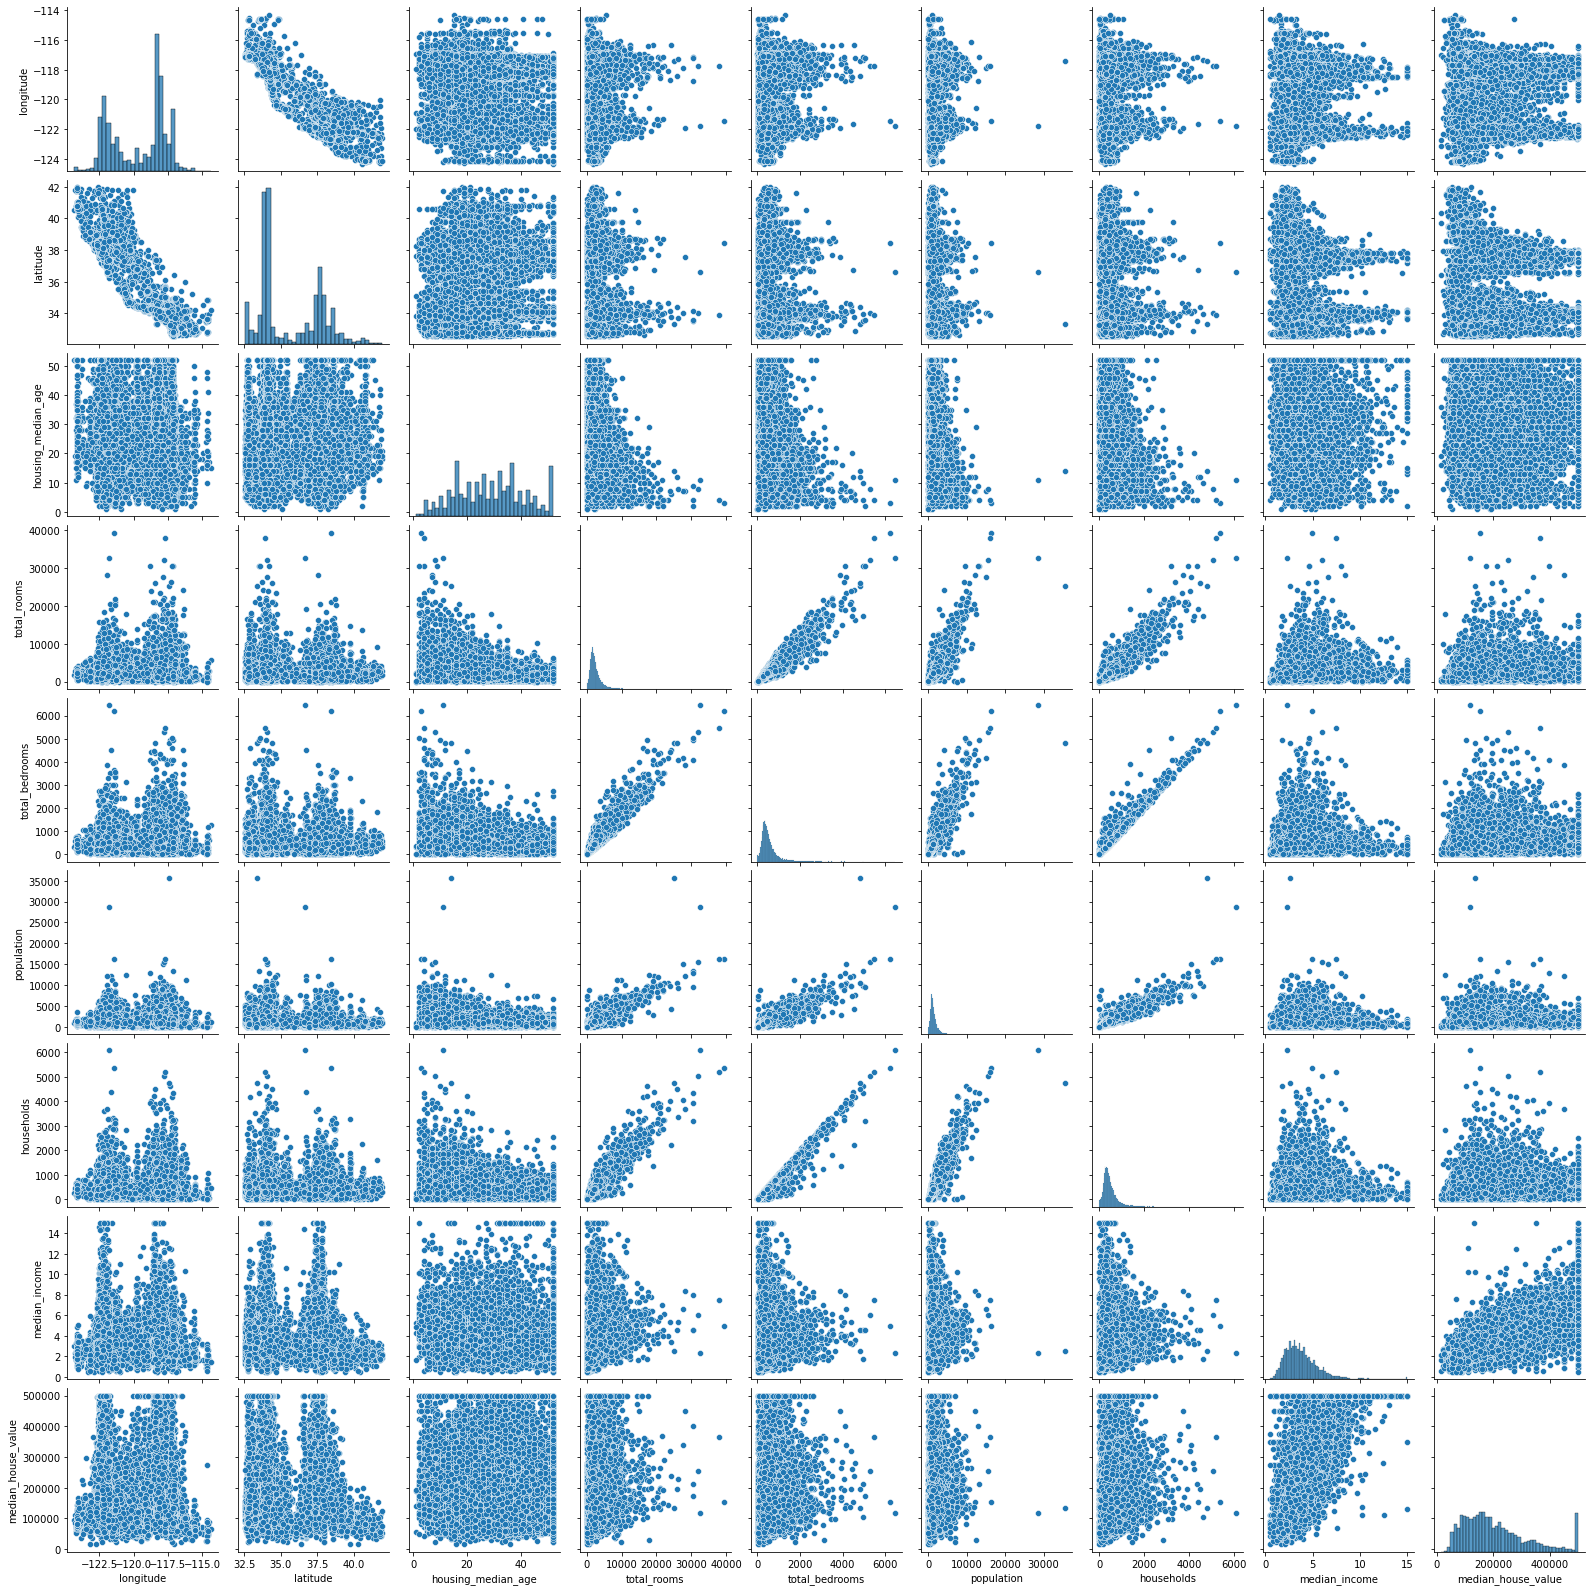

In [14]:
sns.pairplot(df_EDA)

In [17]:
#Analyse du pairplot
# 1- Longitude en fct de latitude nous donne la carte de la californie, avec plus ou moins de concentration de population
#   (il faut creuser plus loin pour voir les répartitions avec un autre graphique)
# 2- l'histogramme longitude en fct de latitude, montre deux quartiers avec une forte concentration de district
#   (creuser plus loin et voir s'il y a une correlation avec les distributions des chambres et de la population...)
# 3- la distribution du mediane_house_value montre un pic à 500000 dollars, comme si les données on été tronquées à ce prix, 
#    ou même arrondis a ce prix, tout ce qui est plus cher est passé à 500000 (à voir la proportion de ces rows dans le set)
# 4- l'age est plafonnée à 52 ans, pareil que ci-dessus, il faut creuser plus loin 
# 5- les incomes sont plafonnés à 15 mille, à creuser 
# 6- correlation entre house_value et income, ce qui est plutot logique, il faut afficher la matrice de corr pour voir à combien

In [ ]:
# on va verifier les points 3, 4 et 5 vu ci-dessous

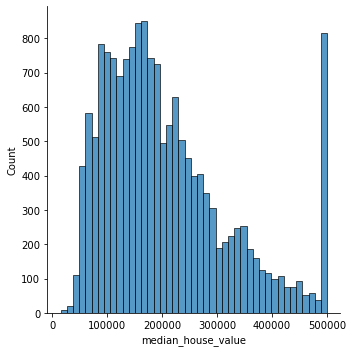

In [87]:
sns.displot(df_EDA['median_house_value'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_income', ylabel='Density'>

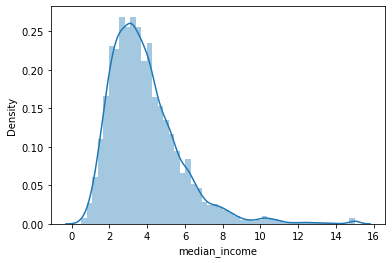

In [19]:
sns.displot(df_EDA['median_income'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='housing_median_age', ylabel='Density'>

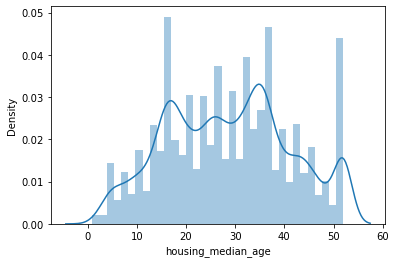

In [20]:
sns.distplot(df_EDA['housing_median_age'])

In [ ]:
# Les trois displot confirment que ces trois features ont été tronquées et arrondis, à une certaine valeur,
# si on compare au max afficher dans notre df.describe(): 
#    *52 ans pour l'age median, *15000 dollars pour le salaire median, et *500001 dollars pour le prix des maisons
#les displot nous montrent que c'est plus flagrant pour le median_house_value (gros pique dans l'histogramme)
#Je vais filtrer ces valeurs à travers un masque, et les afficher sur la carte de californie pour voir s'il y a une logique 

In [32]:
max_value = df_EDA[df_EDA["median_house_value"] >= df_EDA["median_house_value"].max()]
max_value["median_house_value"].value_counts()

500001.0    763
Name: median_house_value, dtype: int64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

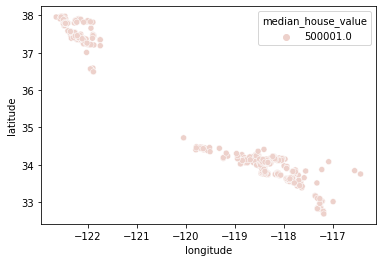

In [33]:
sns.scatterplot(data=max_value, x="longitude", y="latitude", hue = "median_house_value")

In [45]:
max_income = df_EDA[df_EDA["median_income"] >= df_EDA["median_income"].max()]
max_income["median_income"].value_counts()

15.0001    38
Name: median_income, dtype: int64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

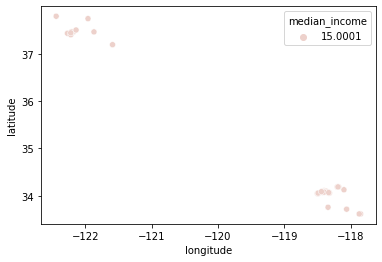

In [46]:
sns.scatterplot(data=max_income, x="longitude", y="latitude", hue = "median_income")

In [38]:
max_age = df_EDA[df_EDA["housing_median_age"] >= df_EDA["housing_median_age"].max()]
max_age["housing_median_age"].value_counts()

52.0    1022
Name: housing_median_age, dtype: int64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

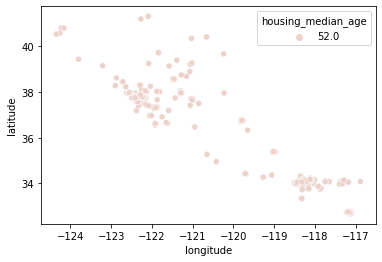

In [39]:
sns.scatterplot(data=max_age, x="longitude", y="latitude", hue = "housing_median_age")

<AxesSubplot:>

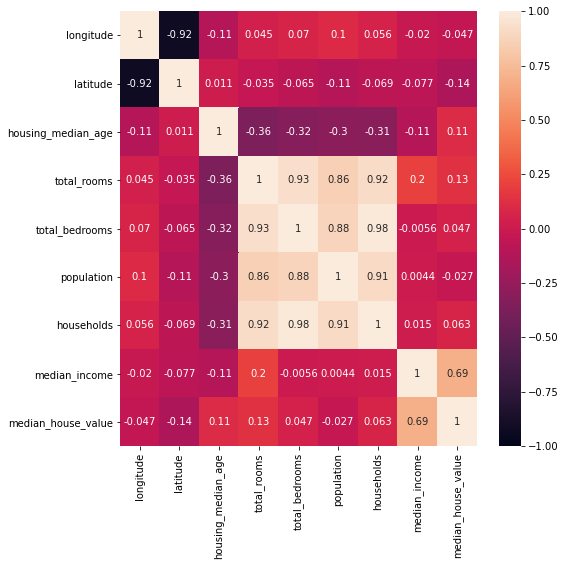

In [42]:
plt.figure(figsize=(6,6))
sns.heatmap(df_EDA.corr(),vmin=-1, vmax=1, annot=True)

In [44]:
corr = df_EDA.corr()
corr_target = corr["median_house_value"].sort_values()
corr_target

latitude             -0.143970
longitude            -0.046754
population           -0.027441
total_bedrooms        0.047478
households            0.063245
housing_median_age    0.108626
total_rooms           0.133218
median_income         0.689659
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [ ]:
#correlation des features entres elles
# - total_bedrooms,total_rooms, households, population sont très correlés, je vais surement en eliminer par la suite 
# - longitude et latitude corrélés, ce qui est logique 
#correlation avec la target y = "median_house_value"
#     - correlation de 0,68 entre la median_income et la target, ce qui confirme les hypothèses à pairplot
#     - très faible correlation avec total_rooms, housing_median_age, latitude mais peut être si elles sont prises ensembles
#       elles ont un poids important dans la prediction de "median_house_value"

In [ ]:
#la matrice de correlation ne prend pas les features de type catégorical, je vais utiliser un plot de seaborn pour observer
#l'impact de la colonne "ocean_proximity" sur le "median_house_value"

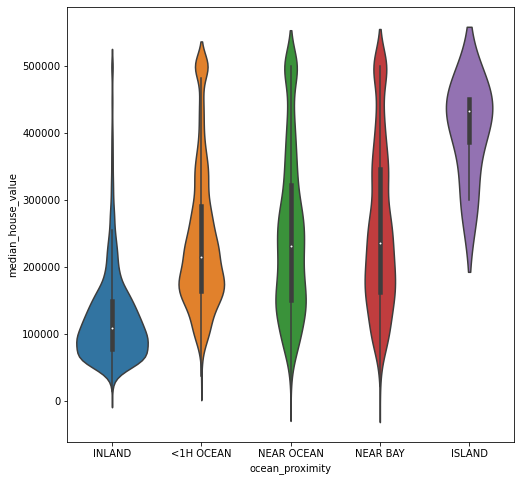

In [47]:
fig, ax = plt.subplots(figsize=(8,8))
sns.violinplot(x="ocean_proximity", y="median_house_value", inner="box", data=df_EDA, ax=ax)
plt.show()

In [ ]:
#Analyse du violinplot
# On remarque que le prix moyen de INLAND est de 100000, contre 45000 pour ISLAND 
# ISLAND sont les plus cher, le prix minimum est de 200000 
# NEAR BAY et NEAR OCEAN on pratiquement la même distribution et le même prix moyen, autour de 230000
# <1H OCEAN a un prix moyen un peu en dessous de NEARBAY et NEAROCEAN
# Par la suite je vais peut etre réduire les catégories en juste 2 ou 3 catégories 

In [ ]:
#Je vais maintenant visualiser comment ce découpage en 5 catégories a été réalisé 

In [76]:
df_map = df_EDA
df_map.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


In [77]:
mapping = {'<1H OCEAN':'1','INLAND':'2', 'NEAR OCEAN':'3', 'NEAR BAY':'4', 'ISLAND':'5'}
df_map['ocean_proximity'] = df_map['ocean_proximity'].map(mapping)
df_map.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,2
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,2
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,2


In [78]:
df_map['ocean_proximity'] = df_map['ocean_proximity'].astype('int')

In [ ]:
#'<1H OCEAN':'1','INLAND':'2', 'NEAR OCEAN':'3', 'NEAR BAY':'4', 'ISLAND':'5'

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

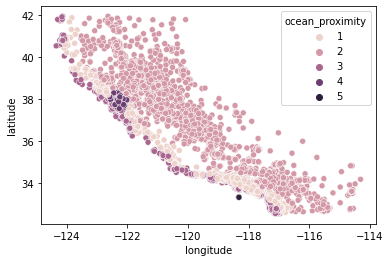

In [79]:
sns.scatterplot(data=df_map, x="longitude", y="latitude", hue = "ocean_proximity")

In [ ]:
#Analyse de la distribusion de la target, donc des prix sur l'espace Californie 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

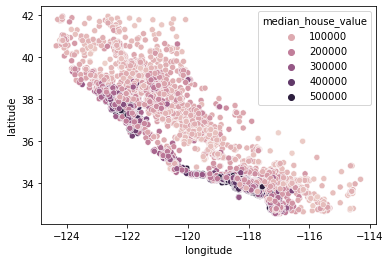

In [80]:
sns.scatterplot(data=df_EDA, x="longitude", y="latitude", hue = "median_house_value")

In [ ]:
#Analyse 

In [ ]:
#On passe à l'analyse des outliers et valeurs aberantes 

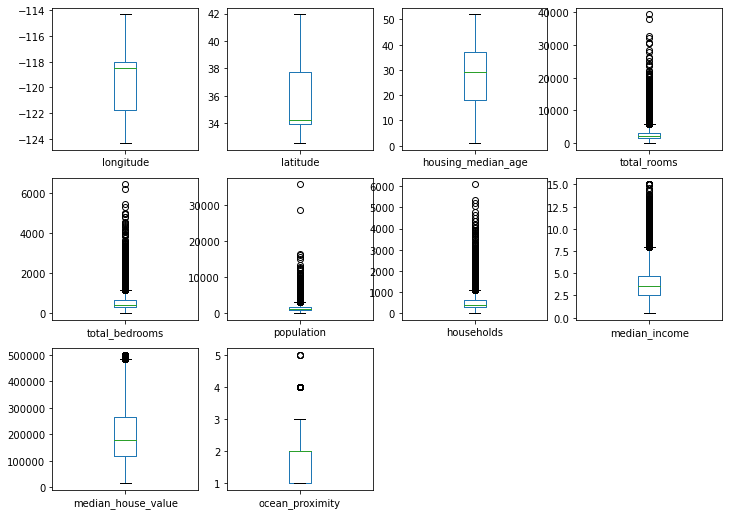

In [81]:
df_EDA.plot(kind='box', subplots=True, layout=(4, 4), figsize = (12, 12));

In [ ]:
silicon_df["zscore"] = (silicon_df.total_bedrooms - silicon_df.total_bedrooms.mean())/ silicon_df.total_bedrooms.std()

In [ ]:
silicon_df[(silicon_df.zscore < -3) | (silicon_df.zscore > 3)]

In [ ]:
maxtresh = silicon_df['median_house_value'].quantile(0.95)
maxtresh

In [ ]:
df2 = silicon_df[silicon_df["median_house_value"] > maxtresh]

df2

In [ ]:
#Outliers, Analyse
#a ce stade les outiliers me paraissent pas aberant je vais les conserver, je verrai à la suite du TP suivant les scores 

In [ ]:
# piste: remplacer les 176 valeurs manquantes à l'aide d'un imputer 

In [ ]:
#Sur la base de cette EDA, je vais créer un notebook "model"

In [85]:
df_EDA.to_csv(r'C:\Users\User\Desktop\Silicon_train\df_EDA.csv', index = False)